In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')
df = pd.DataFrame(data)


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Step 2: One-hot encode categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [12]:
df_encoded.head()



,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [8]:
df.corr()

ValueError: could not convert string to float: 'yes'

In [7]:
df_encoded.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


In [10]:
for col in categorical_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [25]:
correlation_matrix = df.corr()

In [26]:
print("Top correlations with price:")
print(correlation_matrix['price'].sort_values(ascending=False))

Top correlations with price:
price               1.000000
luxury_score        0.601297
area                0.535997
bathrooms           0.517545
stories             0.420712
furnishingStatus    0.304721
Name: price, dtype: float64


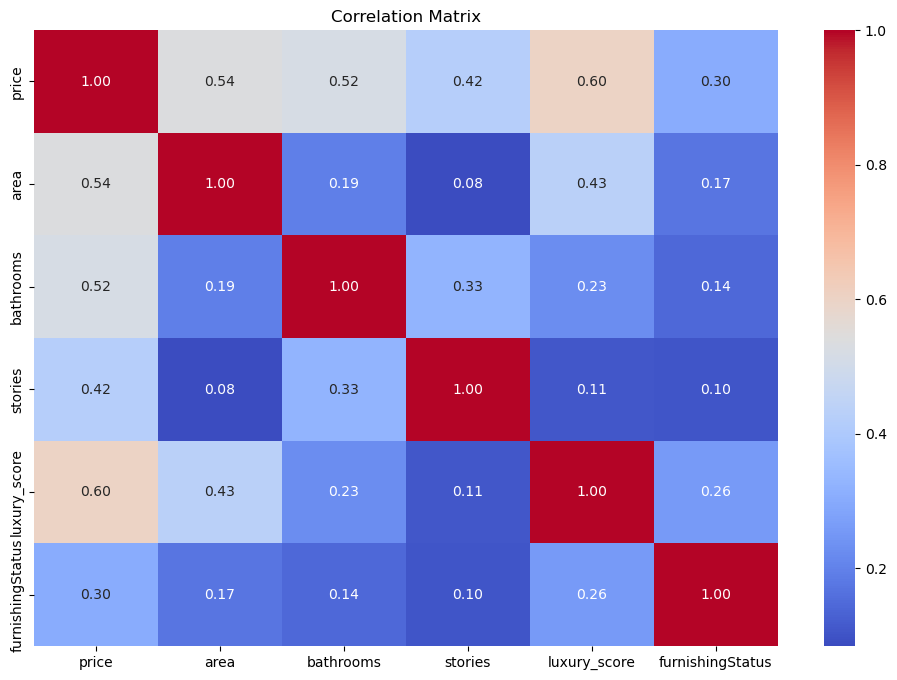

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

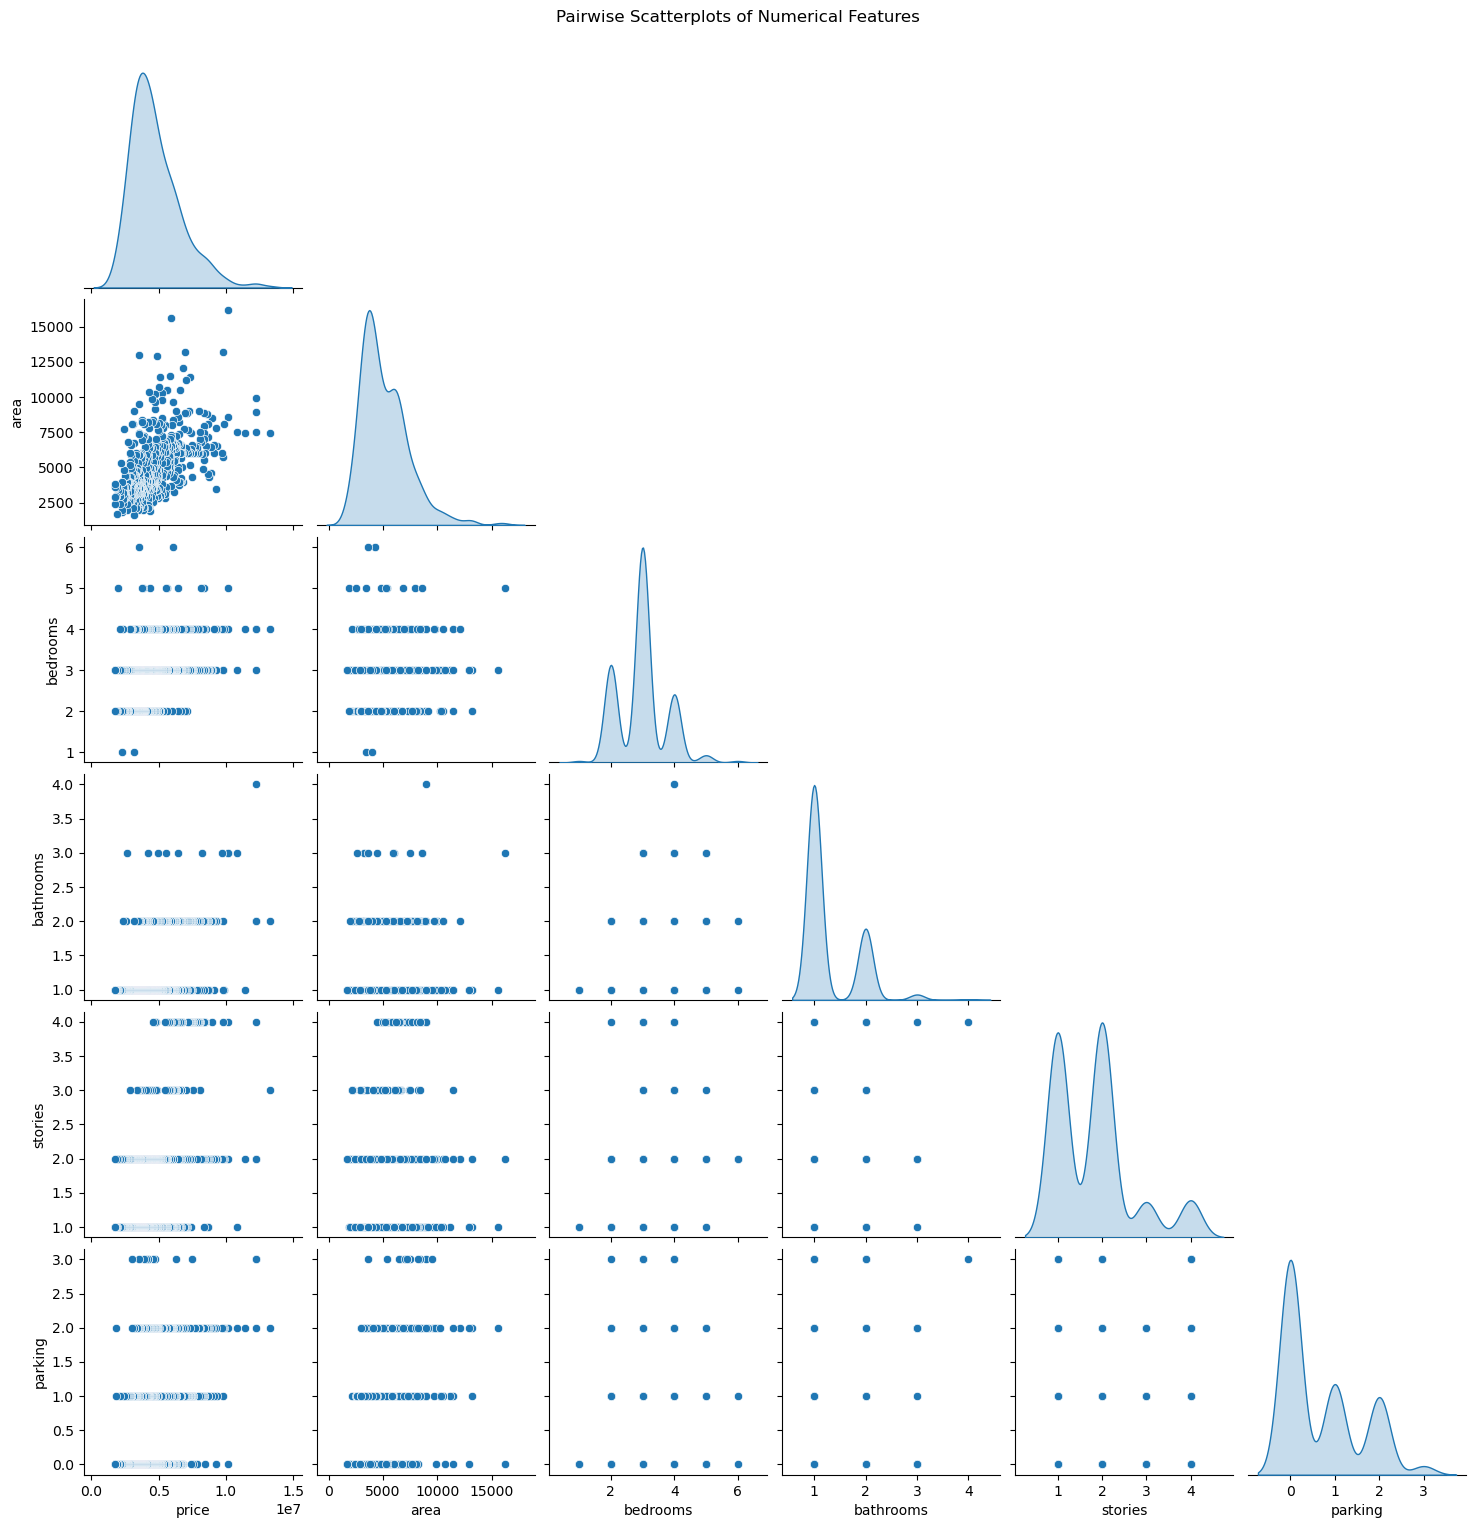

In [17]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Scatterplot matrix
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Scatterplots of Numerical Features", y=1.02)
plt.show()


In [19]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,room_density,luxury_score
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN,0.000809,4
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN,0.000893,4
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN,0.000502,4
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN,0.000800,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN,0.000674,4


In [14]:
df.drop(['bedrooms', 'guestroom', 'hotwaterheating'], axis=1, inplace=True)

In [13]:
df.drop(['furnishingstatus'], axis=1, inplace=True)

In [15]:
df

,price,area,bathrooms,stories,mainroad,basement,airconditioning,parking,prefarea
0,13300000,7420,2,3,1,0,1,2,1
1,12250000,8960,4,4,1,0,1,3,0
2,12250000,9960,2,2,1,1,0,2,1
3,12215000,7500,2,2,1,1,1,3,1
4,11410000,7420,1,2,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,1,1,0,2,0
541,1767150,2400,1,1,0,0,0,0,0
542,1750000,3620,1,1,1,0,0,0,0
543,1750000,2910,1,1,0,0,0,0,0


In [16]:
# Feature engineering
#df['room_density'] = (df['bedrooms'] + df['bathrooms']) / df['area']
df['luxury_score'] = df['airconditioning'] + df['basement'] + df['prefarea'] + df['parking'] + df['mainroad']


In [17]:
df

,price,area,bathrooms,stories,mainroad,basement,airconditioning,parking,prefarea,luxury_score
0,13300000,7420,2,3,1,0,1,2,1,5
1,12250000,8960,4,4,1,0,1,3,0,5
2,12250000,9960,2,2,1,1,0,2,1,5
3,12215000,7500,2,2,1,1,1,3,1,7
4,11410000,7420,1,2,1,1,1,2,0,5
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,1,1,0,2,0,4
541,1767150,2400,1,1,0,0,0,0,0,0
542,1750000,3620,1,1,1,0,0,0,0,1
543,1750000,2910,1,1,0,0,0,0,0,0


In [18]:
df.corr()

,price,area,bathrooms,stories,mainroad,basement,airconditioning,parking,prefarea,luxury_score
price,1.000000,0.535997,0.517545,0.420712,0.296898,0.187057,0.452954,0.384394,0.329777,0.601297
area,0.535997,1.000000,0.193820,0.083996,0.288874,0.047417,0.222393,0.352980,0.234779,0.433481
bathrooms,0.517545,0.193820,1.000000,0.326165,0.042398,0.102106,0.186915,0.177496,0.063472,0.227104
stories,0.420712,0.083996,0.326165,1.000000,0.121706,-0.172394,0.293602,0.045547,0.044425,0.106402
mainroad,0.296898,0.288874,0.042398,0.121706,1.000000,0.044002,0.105423,0.204433,0.199876,0.467224
basement,0.187057,0.047417,0.102106,-0.172394,0.044002,1.000000,0.047341,0.051497,0.228083,0.451019
airconditioning,0.452954,0.222393,0.186915,0.293602,0.105423,0.047341,1.000000,0.159173,0.117382,0.489124
parking,0.384394,0.352980,0.177496,0.045547,0.204433,0.051497,0.159173,1.000000,0.091627,0.735844
prefarea,0.329777,0.234779,0.063472,0.044425,0.199876,0.228083,0.117382,0.091627,1.000000,0.506288
luxury_score,0.601297,0.433481,0.227104,0.106402,0.467224,0.451019,0.489124,0.735844,0.506288,1.000000


In [19]:
df_new=pd.DataFrame(data)

In [20]:
df_new

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [21]:
df['furnishingStatus']= df_new['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [22]:
df

,price,area,bathrooms,stories,mainroad,basement,airconditioning,parking,prefarea,luxury_score,furnishingStatus
0,13300000,7420,2,3,1,0,1,2,1,5,2
1,12250000,8960,4,4,1,0,1,3,0,5,2
2,12250000,9960,2,2,1,1,0,2,1,5,1
3,12215000,7500,2,2,1,1,1,3,1,7,2
4,11410000,7420,1,2,1,1,1,2,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,1,1,0,2,0,4,0
541,1767150,2400,1,1,0,0,0,0,0,0,1
542,1750000,3620,1,1,1,0,0,0,0,1,0
543,1750000,2910,1,1,0,0,0,0,0,0,2


In [23]:
df.corr()

,price,area,bathrooms,stories,mainroad,basement,airconditioning,parking,prefarea,luxury_score,furnishingStatus
price,1.000000,0.535997,0.517545,0.420712,0.296898,0.187057,0.452954,0.384394,0.329777,0.601297,0.304721
area,0.535997,1.000000,0.193820,0.083996,0.288874,0.047417,0.222393,0.352980,0.234779,0.433481,0.171445
bathrooms,0.517545,0.193820,1.000000,0.326165,0.042398,0.102106,0.186915,0.177496,0.063472,0.227104,0.143559
stories,0.420712,0.083996,0.326165,1.000000,0.121706,-0.172394,0.293602,0.045547,0.044425,0.106402,0.104672
mainroad,0.296898,0.288874,0.042398,0.121706,1.000000,0.044002,0.105423,0.204433,0.199876,0.467224,0.156726
basement,0.187057,0.047417,0.102106,-0.172394,0.044002,1.000000,0.047341,0.051497,0.228083,0.451019,0.112831
airconditioning,0.452954,0.222393,0.186915,0.293602,0.105423,0.047341,1.000000,0.159173,0.117382,0.489124,0.150477
parking,0.384394,0.352980,0.177496,0.045547,0.204433,0.051497,0.159173,1.000000,0.091627,0.735844,0.177539
prefarea,0.329777,0.234779,0.063472,0.044425,0.199876,0.228083,0.117382,0.091627,1.000000,0.506288,0.107686
luxury_score,0.601297,0.433481,0.227104,0.106402,0.467224,0.451019,0.489124,0.735844,0.506288,1.000000,0.259297


In [24]:
df.drop(['basement', 'airconditioning', 'mainroad','parking','prefarea'], axis=1, inplace=True)

In [28]:
df

,price,area,bathrooms,stories,luxury_score,furnishingStatus
0,13300000,7420,2,3,5,2
1,12250000,8960,4,4,5,2
2,12250000,9960,2,2,5,1
3,12215000,7500,2,2,7,2
4,11410000,7420,1,2,5,2
...,...,...,...,...,...,...
540,1820000,3000,1,1,4,0
541,1767150,2400,1,1,0,1
542,1750000,3620,1,1,1,0
543,1750000,2910,1,1,0,2


In [29]:
df.drop(['stories'],axis=1,inplace=True)

In [30]:
df

,price,area,bathrooms,luxury_score,furnishingStatus
0,13300000,7420,2,5,2
1,12250000,8960,4,5,2
2,12250000,9960,2,5,1
3,12215000,7500,2,7,2
4,11410000,7420,1,5,2
...,...,...,...,...,...
540,1820000,3000,1,4,0
541,1767150,2400,1,0,1
542,1750000,3620,1,1,0
543,1750000,2910,1,0,2


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load your dataframe
# df = pd.read_csv("your_file.csv")  # Uncomment if reading from a file

# Step 1: Define features and target
X = df[['area', 'bathrooms', 'luxury_score', 'furnishingStatus']]
y = df['price']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,area,bathrooms,luxury_score,furnishingStatus
46,6000,2,3,2
93,7200,2,6,1
335,3816,1,5,2
412,2610,1,3,0
471,3750,1,1,0
...,...,...,...,...
71,6000,2,2,0
106,5450,2,4,1
270,4500,2,2,2
435,4040,1,1,0


In [36]:
class myLR:

    def __init__(self):
        self.coef_=None
        self.intercept_=None
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        #calculating the coefficients
        betas= np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_= betas[0]
        self.coef_= betas[1:]

    def predict(self,X_test):
        y_pred= np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [37]:
lr = myLR()

In [42]:
lr.fit(X_train,y_train)

In [43]:
X_train.shape

(436, 4)

In [41]:
X_train

,area,bathrooms,luxury_score,furnishingStatus
46,6000,2,3,2
93,7200,2,6,1
335,3816,1,5,2
412,2610,1,3,0
471,3750,1,1,0
...,...,...,...,...
71,6000,2,2,0
106,5450,2,4,1
270,4500,2,2,2
435,4040,1,1,0


In [44]:
y_pred= lr.predict(X_test)

In [45]:
r2_score(y_test,y_pred)

0.5487576119926971

In [46]:
lr.coef_

array([2.35794171e+02, 1.39127598e+06, 4.31562929e+05, 2.76265482e+05])

In [47]:
lr.intercept_

415825.50336306944